# Final Project
### Halina Vercessi-Clarke and Hannah Nguyen

In [288]:
#importing the libraries
import os 
import cv2
import numpy as np
from skimage import io
import tensorflow as tf
tf.config.experimental_run_functions_eagerly(True)
import matplotlib.pyplot as plt
%matplotlib inline
import math
import pathlib
from tensorflow.keras import layers
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator 

#importing scikit learning modules
from sklearn.model_selection import train_test_split


In [256]:

# file_path = 'C:/Users/Halina/Documents/GitHub/Fashion-throughout-the-Years/images'
file_path = os.getcwd() + '\images'
data = [] 
labels = []
i = 0
label_names = os.listdir(file_path)
#print(label_names)
classes = []
for root, dirs, files in os.walk(file_path):
    path = str(root).replace(str(chr(92)), "/")
    if (path.split("/")[-1]!='images'):
        classes.append(label_names[i].split(" ")[0])
        for img in os.listdir(path):
            # print(label_names[i])
            pic = cv2.imread(os.path.join(path,img))
            #print(img)
            
    
#             input_arr = np.array([input_arr])  # Convert single image to a batch
            pic = cv2.resize(pic,(80,80))
            pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
            data.append(pic)
            
#             pic = tf.keras.preprocessing.image.load_img(os.path.join(path,img), grayscale=False, color_mode="rgb", target_size=(80,80), interpolation="nearest")
#             input_arr = tf.keras.preprocessing.image.img_to_array(pic)
#             data.append(input_arr)


            labels.append([i])
        i+=1
print(classes) 

['1820', '1830', '1840', '1850', '1860', '1870', '1880', '1890', '1900', '1910', '1920', '1925', '1930', '1935', '1940', '1945', '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']


In [257]:
len(classes)

87

In [259]:
print(len(labels))
labels[0:16]

1300


[[0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1]]

In [260]:
data = np.asarray(data)
labels = np.asarray(labels)
#print(data[344])
#print(labels[344])
#data[0].flatten()

In [261]:
print(data[344].shape)
#plt.imshow(saved[0].reshape(80,80,3))
#data[344]

(80, 80, 3)


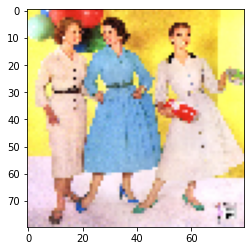

In [262]:
plt.imshow(data[344].reshape(80, 80, 3))

In [263]:
# Split the dataset
train_images, test_images, train_labels, test_labels = train_test_split(data, labels, test_size = 0.25, random_state = 0)

In [264]:
train_images.shape

(975, 80, 80, 3)

In [265]:
test_images.shape

(325, 80, 80, 3)

In [266]:
train_labels.shape

(975, 1)

In [267]:
test_labels.shape

(325, 1)

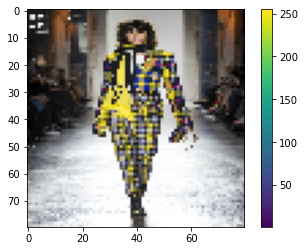

In [268]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [269]:
train_images = train_images / 255.0

test_images = test_images / 255.0


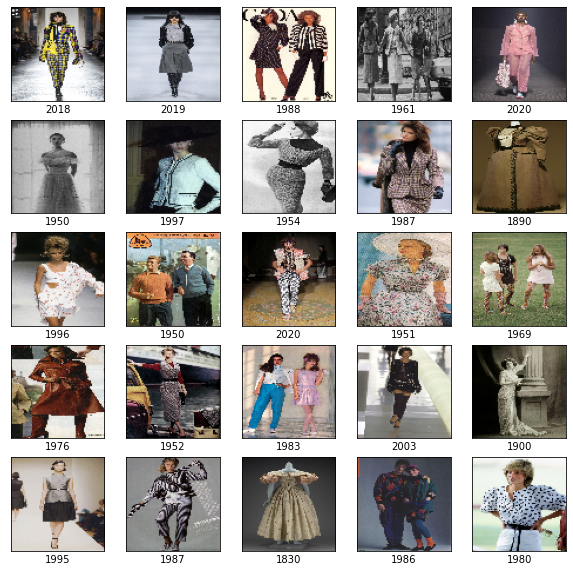

In [272]:

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(classes[train_labels[i][0]])
plt.show()


In [273]:
train_labels = to_categorical(train_labels, 87)
test_labels = to_categorical(test_labels, 87)
print(train_labels[0])


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [300]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Flatten(input_shape=(80, 80, 3)),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(87)
# ])

# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Conv2D(32, (5, 5), activation='relu', input_shape=(80,80,3)))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(tf.keras.layers.Conv2D(64, (5, 5), activation='relu'))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(tf.keras.layers.GaussianNoise(1))
# model.add(tf.keras.layers.GaussianDropout(0.02))

# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(100, activation='relu'))
# model.add(tf.keras.layers.GaussianNoise(0.02))
# model.add(tf.keras.layers.Dense(87, activation='softmax'))


model = Sequential([  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),  layers.Conv2D(16, 3, padding='same', activation='relu'),  layers.MaxPooling2D(),  layers.Conv2D(32, 3, padding='same', activation='relu'),  layers.MaxPooling2D(),  layers.Conv2D(64, 3, padding='same', activation='relu'),  layers.MaxPooling2D(),  layers.Flatten(),  layers.Dense(128, activation='relu'),  layers.Dense(num_classes)])



In [294]:
#model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [307]:
def make_convolutional_autoencoder():
    # encoding
    inputs = tf.keras.layers.Input(shape=(80, 80, 3))
    x = tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same')(inputs)
    x = tf.keras.layers.MaxPooling2D(padding='same')(x)
    x = tf.keras.layers.Conv2D( 8, 3, activation='relu', padding='same')(x)
    x = tf.keras.layers.MaxPooling2D(padding='same')(x)
    x = tf.keras.layers.Conv2D( 8, 3, activation='relu', padding='same')(x)
    encoded = tf.keras.layers.MaxPooling2D(padding='same')(x)    
    
    # decoding
    x = tf.keras.layers.Conv2D( 8, 3, activation='relu', padding='same')(encoded)
    x = tf.keras.layers.UpSampling2D()(x)
    x = tf.keras.layers.Conv2D( 8, 3, activation='relu', padding='same')(x)
    x = tf.keras.layers.UpSampling2D()(x)
    x = tf.keras.layers.Conv2D(16, 3, activation='relu')(x) # <= padding='valid'!
    x = tf.keras.layers.UpSampling2D()(x)
    decoded = tf.keras.layers.Conv2D(1, 3, activation='sigmoid', padding='same')(x)
    
    # autoencoder
    autoencoder = tf.keras.Model(inputs, decoded)
    autoencoder.compile(optimizer='adam', 
                        loss='binary_crossentropy')
    return autoencoder

In [308]:
def add_noise(x, noise_factor=0.2):
    x = x + np.random.randn(*x.shape) * noise_factor
    x = x.clip(0., 1.)
    return x

In [309]:
#hist = model.fit(train_images, train_labels, batch_size=1, epochs=10)
train_images_noisy = add_noise(train_images)
#train_labels_noisy = add_noise(train_labels)

test_images_noisy  = add_noise(test_images)
autoencoder = make_convolutional_autoencoder()
autoencoder.fit(train_images_noisy, train_images, 
                epochs=50, 
                batch_size=1)
                #validation_data=(X_valid_noisy, X_valid))

NameError: name 'ts' is not defined

In [94]:
model.evaluate(test_images, test_labels_one_hot, batch_size=1)

325/325 [==============================] - 6s 17ms/step - loss: 4.5249 - accuracy: 0.0000e+00


[4.524944305419922, 0.0]

In [ ]:
#Visualize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()